<a href="https://colab.research.google.com/github/tmollick95/EnvDatSci/blob/main/CodeSprints/FeatureDependence_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Read in data
The "CEE 609 Height Model" sheet contains your measurements of your wrist circumference, foot length, and your self-reported height entered during class.

In [2]:
worksheet = gc.open('CEE 609 Height Model').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

import pandas as pd
df = pd.DataFrame.from_records(rows) #convert data to pandas dataframe
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df


[['Wrist circumference', 'Foot length', 'Height'], ['16', '30', '194'], ['12', '26', '100'], ['19', '32', '176'], ['16', '27', '172.1'], ['18.2', '29.1', '180.3'], ['18', '27', '178'], ['18', '30', '182'], ['13', '27', '100'], ['12', '26', '168'], ['12.5', '26', '165'], ['15', '26', '170'], ['16', '27', '171'], ['16', '30', '183'], ['12', '23', '173.7'], ['12', '24', '160'], ['16', '26', '175'], ['15', '23', '155'], ['14', '25', '165'], ['15', '25', '162']]


,Wrist circumference,Foot length,Height
1,16,30,194
2,12,26,100
3,19,32,176
4,16,27,172.1
5,18.2,29.1,180.3
6,18,27,178
7,18,30,182
8,13,27,100
9,12,26,168
10,12.5,26,165


In [3]:
list=rows[0][1:3] #create a list of column names of predictors
print(list)

['Foot length', 'Height']


In [5]:
import numpy as np
X = np.array(df[list].values) #create numpy array of predictors
Y = np.array(df['Height'].values) #create numpy array of predictand

In [6]:
#convert to type numeric float
X = X.astype('float')
Y = Y.astype('float')

#Are my predictors correlated?
Below we generate a correlation coefficient matrix for our predictors using the numpy corrcoef function.

In [7]:
np.corrcoef(X[:,0],X[:,1])

array([[1.       , 0.3220554],
       [0.3220554, 1.       ]])

Remember that correlation coefficients > 0.7 are generally considered "too much" for model stability.

Next, we'll use the standard formula to estimate the coefficients in this regression:
\begin{equation*}
\beta = (X^{T}X) ^ { -1 } X^{T}Y
\end{equation*}

By first creating the variable:
\begin{equation*}
(X^{T}X) =XTX
\end{equation*}

to simplify the calculations.


In [8]:
XTX=np.matmul(X,np.transpose(X))

In [9]:
XTX

array([[38536.  , 20180.  , 35104.  , 34197.4 , 35851.2 , 35342.  ,
        36208.  , 20210.  , 33372.  , 32790.  , 33760.  , 33984.  ,
        36402.  , 34387.8 , 31760.  , 34730.  , 30760.  , 32760.  ,
        32178.  ],
       [20180.  , 10676.  , 18432.  , 17912.  , 18786.6 , 18502.  ,
        18980.  , 10702.  , 17476.  , 17176.  , 17676.  , 17802.  ,
        19080.  , 17968.  , 16624.  , 18176.  , 16098.  , 17150.  ,
        16850.  ],
       [35104.  , 18432.  , 32000.  , 31153.6 , 32664.  , 32192.  ,
        32992.  , 18464.  , 30400.  , 29872.  , 30752.  , 30960.  ,
        33168.  , 31307.2 , 28928.  , 31632.  , 28016.  , 29840.  ,
        29312.  ],
       [34197.4 , 17912.  , 31153.6 , 30347.41, 31815.33, 31362.8 ,
        32132.2 , 17939.  , 29614.8 , 29098.5 , 29959.  , 30158.1 ,
        32304.3 , 30514.77, 28184.  , 30819.5 , 27296.5 , 29071.5 ,
        28555.2 ],
       [35851.2 , 18786.6 , 32664.  , 31815.33, 33354.9 , 32879.1 ,
        33687.6 , 18815.7 , 31047.  , 30

In [10]:
XTX.shape

(19, 19)

In [11]:
np.linalg.det(XTX) #no determinant!

0.0

In [12]:
np.linalg.inv(XTX) #cannot invert!

LinAlgError: Singular matrix

Since XTX matrix is not invertable, we'll use the numpy pinv to calculate the Moore-Penrose pseudo-inverse of a matrix:

In [13]:
betas = np.matmul(np.transpose(np.matmul(np.linalg.pinv(XTX), X)), Y)
print("The estimated coefficient on " + list[0] + " is " + str(betas[0]) + " and the estimated coefficient on " + list[1] + " is " + str(betas[1]))

The estimated coefficient on Foot length is 2.55351295663786e-15 and the estimated coefficient on Height is 1.000000000000006


Next, we use the OLS (ordinary least squares) function from statsmodels to calculate the same coefficients. OLS regression works by finding the values of $\hat{\beta}$ that minimize the following equation:
\begin{equation*}
S(\hat{\beta}) = \sum _ { i = 1 } ^ { n } {| y _ { i } -\sum _ { j = 1 } ^ { J } x _ { i,j} {\beta _ {j}} |^{2}}
\end{equation*}

In [14]:
from statsmodels.api import OLS
lm = OLS(Y,X).fit().summary()
print(lm)
# They match! But we can see that the coeficient on foot lenght is not significant.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.518e+32
Date:                Sun, 10 Nov 2024   Prob (F-statistic):                   3.09e-268
Time:                        05:54:28   Log-Likelihood:                          564.29
No. Observations:                  19   AIC:                                     -1125.
Df Residuals:                      17   BIC:                                     -1123.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


# Penalized regression
In penalized regression, we solve the equation:

\begin{equation*}
\beta = (X^{T}X+ \lambda I) ^ { -1 } X^{T}Y
\end{equation*}

Where $\lambda$ is a tunable coefficient.

This effectively creates a situation where we are finding the values of  $\hat{\beta}$ that minimize the following equation:
\begin{equation*}
S(\hat{\beta}) = \sum _ { i = 1 } ^ { n } {| y _ { i } -\sum _ { j = 1 } ^ { J } x _ { i,j} {\beta _ {j}} |^{2}} +\sum _ { j = 1 } ^ { J }\lambda\beta _ {j}^{2}
\end{equation*}


In [15]:
#When Lambda = 0, we have OLS regression
L1=0
betas = np.matmul(np.transpose(np.matmul(np.linalg.pinv(XTX+L1*np.identity(XTX.shape[0])), X)), Y)
betas

array([2.55351296e-15, 1.00000000e+00])

In [16]:
#As we increase L1, we decrease the net magnitude of both coefficients
L1_list=range(1,50000)
coef_frame=pd.DataFrame(L1_list)
coef_frame.columns=["L1"]
coef_frame["B_Wrist"]=np.nan
coef_frame["B_Foot"]=np.nan


In [17]:
coef_frame

,L1,B_Wrist,B_Foot
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
49994,49995,NaN,NaN
49995,49996,NaN,NaN
49996,49997,NaN,NaN
49997,49998,NaN,NaN


In [18]:
for L1 in L1_list:
  betas = np.matmul(np.transpose(np.matmul(np.linalg.inv(XTX+L1*np.identity(XTX.shape[0])), X)), Y)
  coef_frame.iat[L1-1,1]=betas[0]
  coef_frame.iat[L1-1,2]=betas[1]



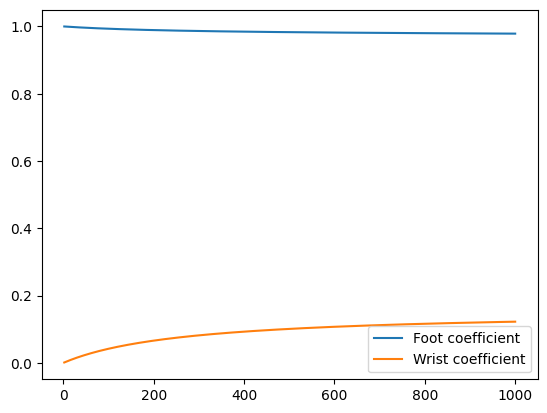

In [19]:
import matplotlib.pyplot as plt
plt.plot(coef_frame.L1[1:1000], coef_frame.B_Foot[1:1000], label = "Foot coefficient")
plt.plot(coef_frame.L1[1:1000], coef_frame.B_Wrist[1:1000], label = "Wrist coefficient")
plt.legend()
plt.show()
#for L1 = 1:1000

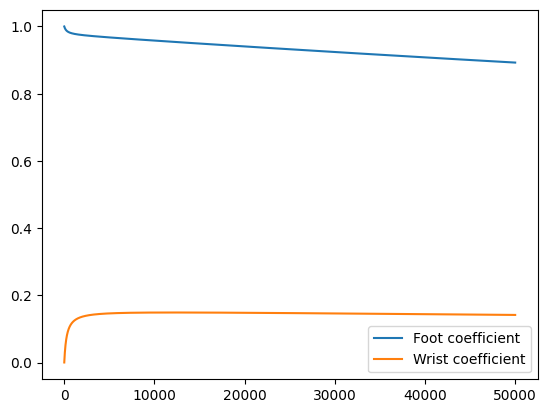

In [20]:
import matplotlib.pyplot as plt

plt.plot(coef_frame.L1, coef_frame.B_Foot, label = "Foot coefficient")
plt.plot(coef_frame.L1, coef_frame.B_Wrist, label = "Wrist coefficient")
plt.legend()
plt.show()
#For L1 = 1:50000